In [1]:
# Завдавння 1:

In [2]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Завантаження датасету
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

# Створення датафрейму
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Поділ на ознаки та цільову змінну
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# Розділення на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Виведення розмірів вибірок
print(f"Розмір навчальної вибірки: {X_train.shape}, тестової: {X_test.shape}")


Розмір навчальної вибірки: (16512, 8), тестової: (4128, 8)


In [3]:
# Побудова базової лінійної регресійної моделі
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Оцінка точності моделі
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")


Train MSE: 0.5179331255246699, Test MSE: 0.5558915986952446
Train R^2: 0.6125511913966952, Test R^2: 0.5757877060324506


In [4]:
# Ridge Regression (L2 регуляризація)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {ridge_mse}, Ridge R^2: {ridge_r2}")

# Lasso Regression (L1 регуляризація)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {lasso_mse}, Lasso R^2: {lasso_r2}")


Ridge MSE: 0.5558034669932214, Ridge R^2: 0.5758549611440125
Lasso MSE: 0.6135115198058131, Lasso R^2: 0.5318167610318159


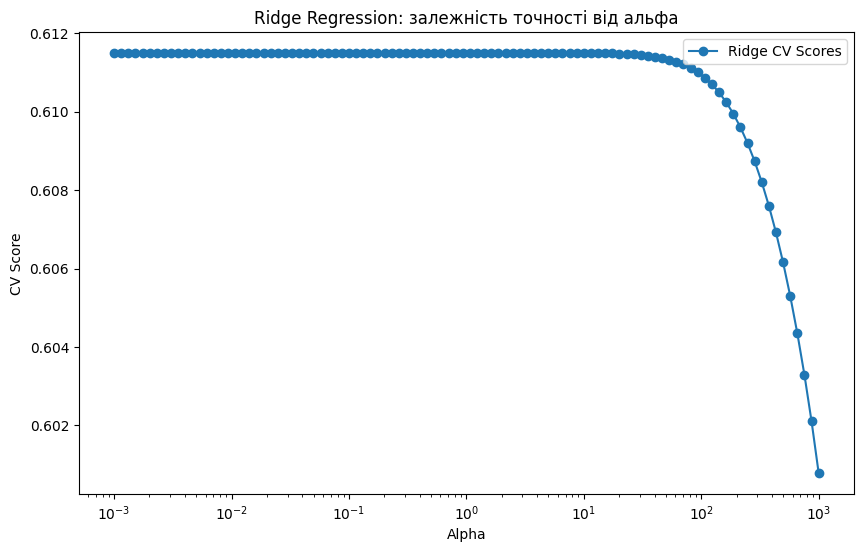

In [5]:
# Крос-валідація для Ridge Regression
alphas = np.logspace(-3, 3, 100)
ridge_cv_scores = [cross_val_score(Ridge(alpha=a), X_train, y_train, cv=5).mean() for a in alphas]

# Візуалізація залежності точності від параметра альфа
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_cv_scores, marker='o', label="Ridge CV Scores")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.title('Ridge Regression: залежність точності від альфа')
plt.legend()
plt.show()


In [ ]:
 #Висновки: Використання регуляризації (L1 та L2) допомагає запобігти перенавчанню, що призводить до кращих результатів на тестових даних. 
#           Оптимальний параметр регуляризації був визначений за допомогою крос-валідації.

In [6]:
#Завдання 2:

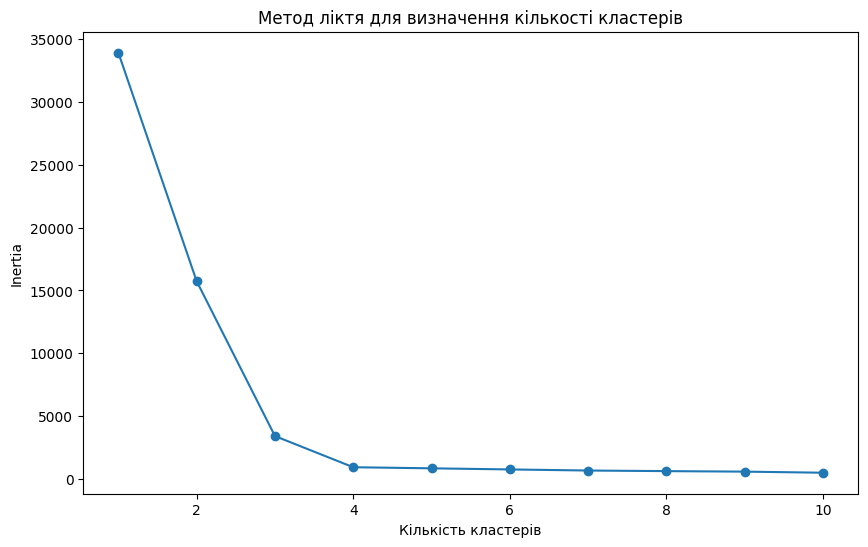

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Створення синтетичного датасету для кластеризації
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Метод ліктя
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()


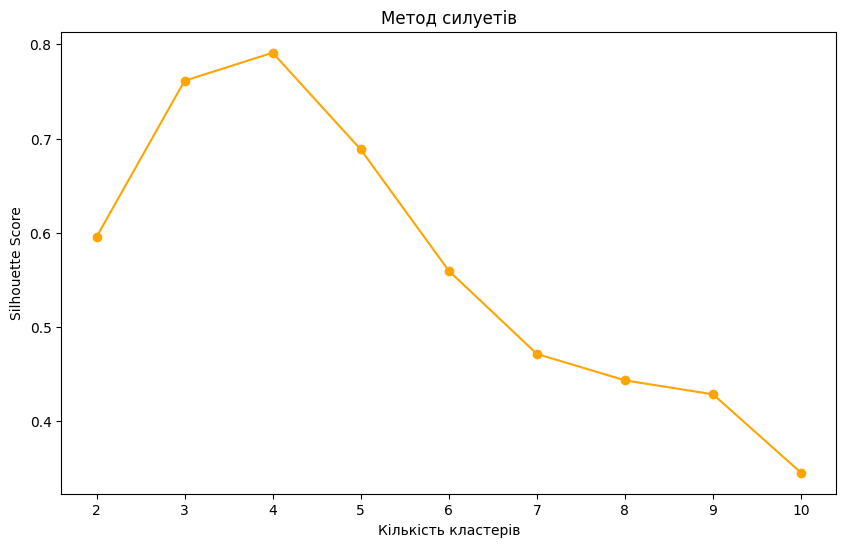

In [8]:
# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()


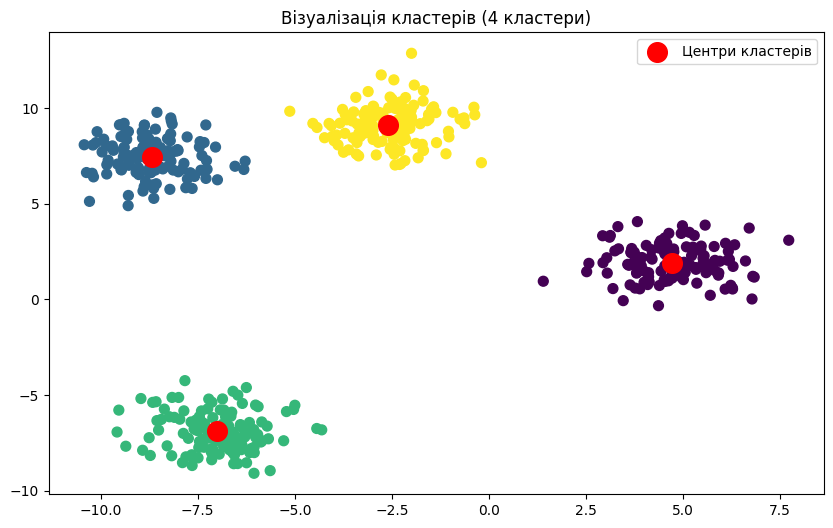

In [9]:
# Візуалізація кластерів для оптимальної кількості кластерів (наприклад, 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Центри кластерів')
plt.title(f'Візуалізація кластерів ({optimal_clusters} кластери)')
plt.legend()
plt.show()


In [ ]:
#Висновки:  За допомогою методу ліктя та силуетів було визначено оптимальну 
#           кількість кластерів для синтетичних даних, що дозволяє ефективно класифікувати дані.